In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


###Exploratory Data Analysis (EDA):
### **Loading the data**

### **Read the data**

In [ ]:
# Read the data
df = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Summary Statistics of this Dataset**

**Checking the info of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [ ]:
df.shape

(398, 8)

In [ ]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


**Write your observations here:**
- I observe that the dataset has been loaded properly.
- The dataset has 398 entries and 8 columns.
- The dataset has column names that are mpg, cylinders, displacement, horsepower, weight,acceleration, model year, car name.
- Their are no missing values in the dataset if their were missing values isnull would be true.
- There are 8 columns in the dataset and every column is of numeric data type.

There are 8 variables in the dataset:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

### ***Data cleanin*g**

# Check for dulicate Data

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
393,False
394,False
395,False
396,False


**Conclusion:** Their are no duplicates in the data

**Checking the unique values**





In [ ]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
car name,305


In [ ]:
df["car name"].nunique()

305

**Conclusions about data in each column:**
- The **car name** column has about 305 unique values.
- The **mpg** column has about 129 unique values.
- The **cylinders** columnhas about 5 unique values.
- The **displacement** column has about 82 unique values.
- The **horsepower** column has about 94 unique values.
- The **weight** column has about 351 unique values.
- The **acceleration** column has about 95 unique values.
- The **model year** columnhas about 13 unique values.

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [ ]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


** **bold text**Conclusion: No missing Values**

#We need to find the Statstical summary of the Data

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


**Now we know the mean, the standard deviation and ect.**

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = df.copy()

# Dropping the column 'car name'
data = df.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [ ]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column.
- First, we need to **replace the ? with np.nan**.

In [ ]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


### **Let's check the distribution and outliers for each column in the data**

## **Exploratory Data Analysis and Data Preprocessing**

- Create histograms to check the distribution of all the variables
- Create boxplots to visualize the outliers for all the variables

mpg
Skew : 0.46


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


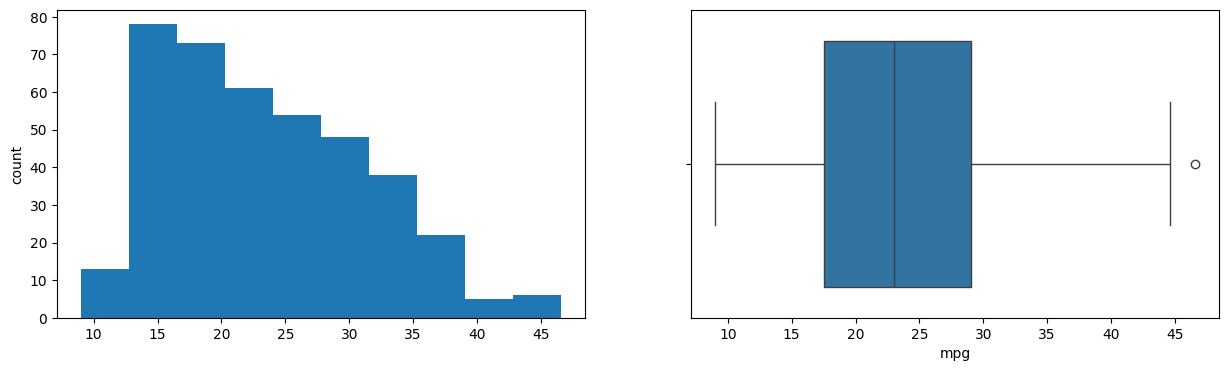

cylinders
Skew : 0.53


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


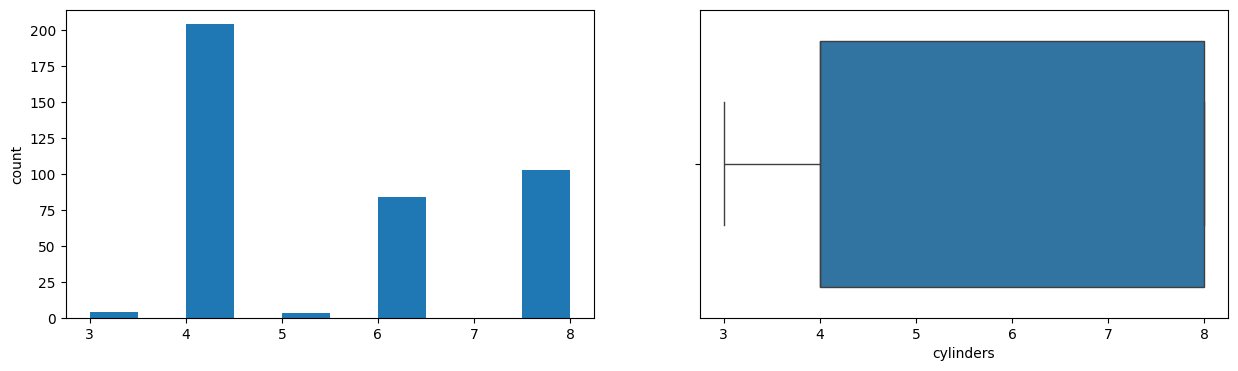

displacement
Skew : 0.72


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


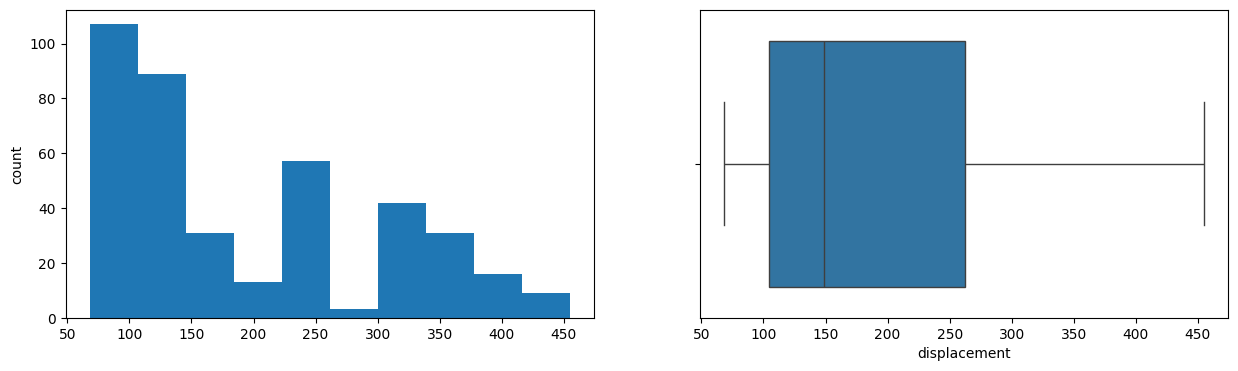

horsepower
Skew : 1.09


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


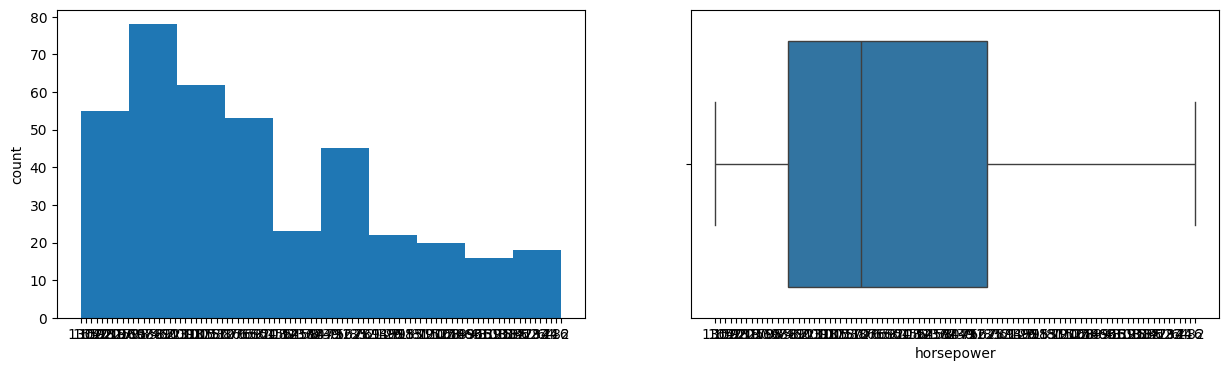

weight
Skew : 0.53


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


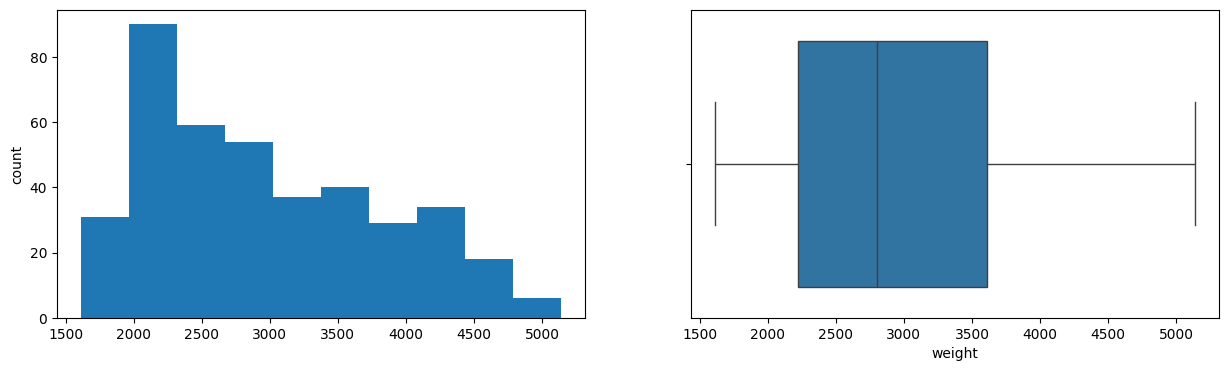

acceleration
Skew : 0.28


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


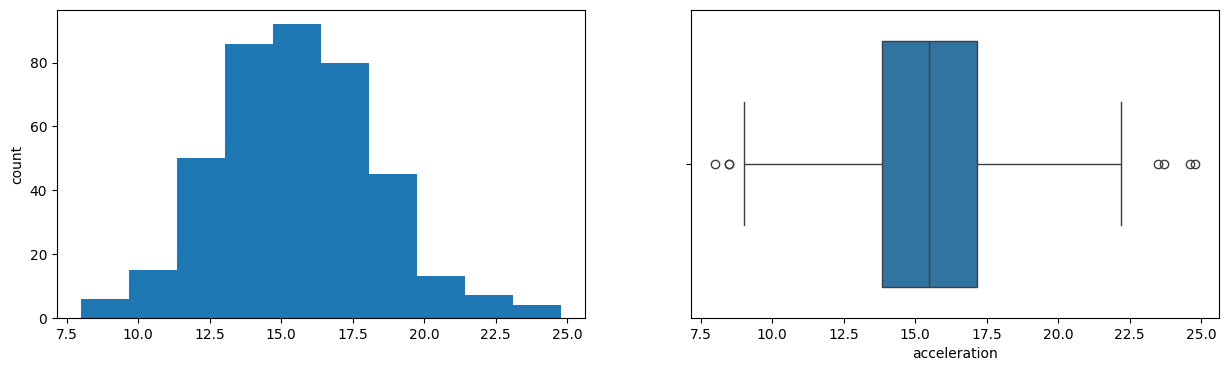

model year
Skew : 0.01


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


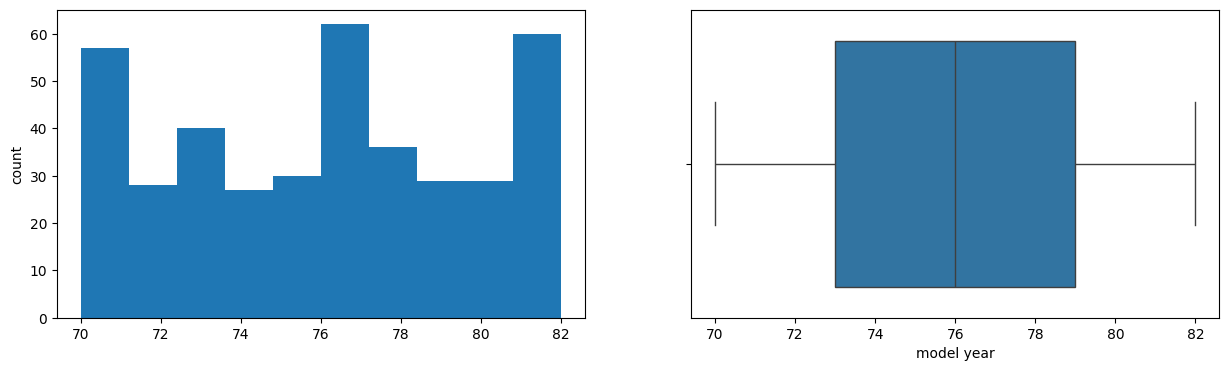

In [ ]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Write your observations here:** There are box and wiskers plots as well as other plots as well. The box and wiskers are for model year and acelleration and they mostly place things in the middle.

### **Checking the correlation**

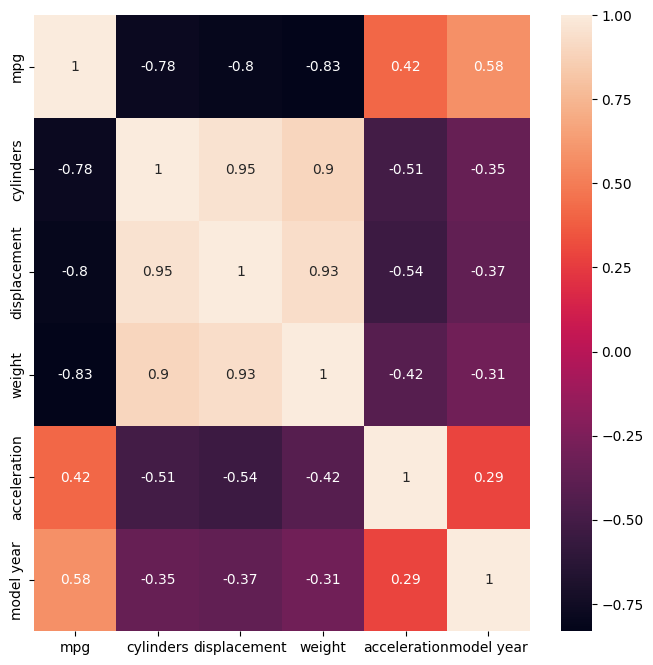

In [ ]:
plt.figure(figsize = (8, 8))
num_cols = data.select_dtypes(include = "number").columns.to_list()
sns.heatmap(data[num_cols].corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.664133,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.574594,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.184397,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.184397,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.924265,0.565841,-1.840117,-1.627426


###**Univariant analysis**

<Axes: >

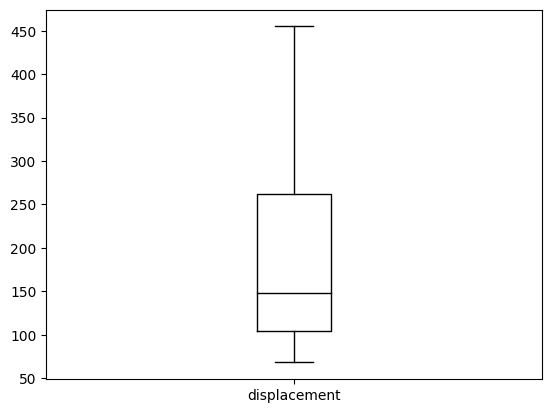

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column=["displacement"], grid=False, color='black')

array([[<Axes: title={'center': 'displacement'}>]], dtype=object)

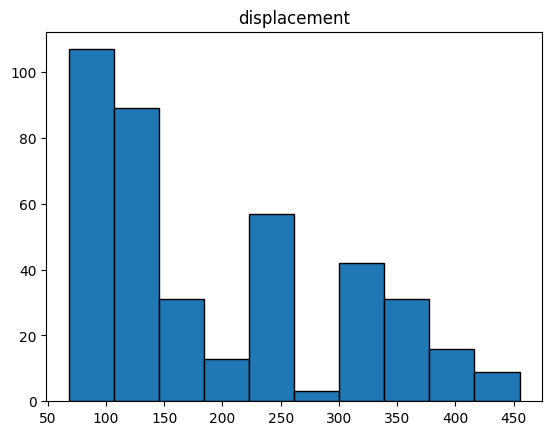

In [ ]:
import matplotlib.pyplot as plt

df.hist(column='displacement', grid=False, edgecolor='black')

<Axes: xlabel='displacement', ylabel='Density'>

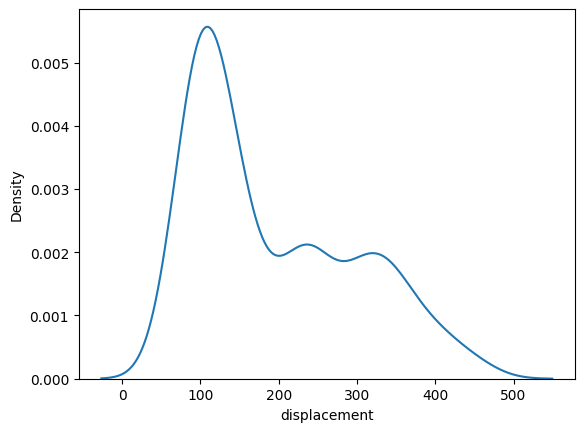

In [ ]:
import seaborn as sns

sns.kdeplot(df['displacement'])

<Axes: xlabel='displacement', ylabel='Count'>

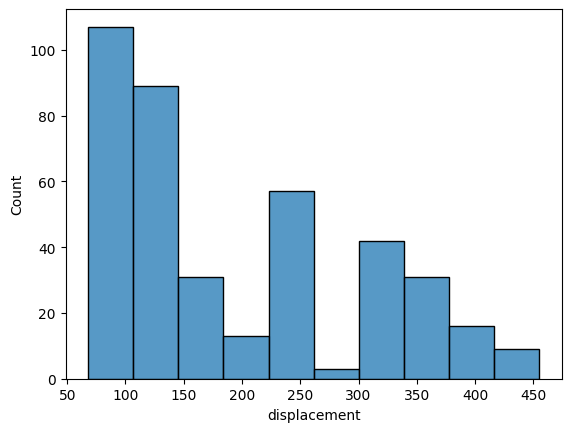

In [ ]:
sns.histplot(data['displacement'])

##Build a Simple Model:
 1. **linear regression for predicting continuous values**



##**Plot to see if displacement has a linear relationship with displacement**




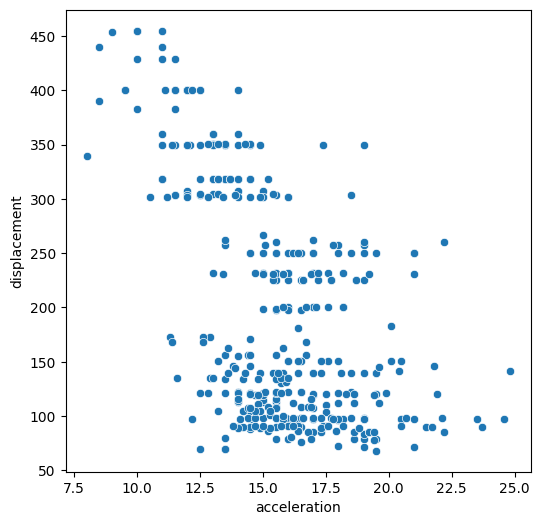

In [ ]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'acceleration', y = 'displacement', data = df)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

In [ ]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')


In [ ]:
estimate_coef(df['acceleration'], df['displacement'])

(513.4593410483337, -20.557014531275613)

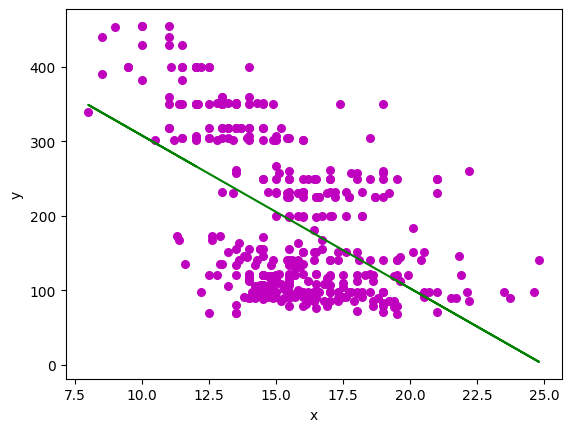

In [ ]:
plot_regression_line(x = df['acceleration'], y= df['displacement'],b = (513.4593410483337, -20.557014531275613))

predict displaement at acelleration of 12.5

In [ ]:

from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
# Step-1
X = cars_data.drop(['Acelleration'], axis = 1)

y = cars_data[["displacement"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log'])

In [ ]:
# Get score of the model
LR_score = get_model_score(lr)

In [ ]:
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)

# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):

    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)

    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

In [ ]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

## **Conclusion and Business Recommendations**

**Write your Conclusion and Business Recommendations here:** In conclusion the Data analysis proved to be very successful Conclusions:

After doing the analysis my conclusions is it might be important to use tester variables like nunique() in your data analysis venture because you get to know important info like own many values are unique or used multiple times.You also get to use values df.info() and df.shape(). Overall its imporant to know these information to know what and how to graph things during univariant and multivariant analysis. From the analysis via the datapype, the isnull() and the nunique is import.

What I learned in the second round of Data analysis the univariant data analysis is that the data itself was ploted a simple variable was analysed and I got to see how that variable compared to things overall. mean(), median(), mode() were all found as well as boxplot, linplot and ect chosen to plot things

The t-sNE portion was extremely important and gave me great insight into the data. It was important to understand the clustering of the different data and the datatypes. It is important to understand the good things about the data and how they relate.
Recommendations:

Overall is was a great analysis. I recomend maybe using it for a more intersting study like one on the medical feild to get more interesting information. Overall I would recommend the use of more graphs in the multivariate analysis over the univariate analysis so that it is easier to come to a conclusion about how the information compares.